<a href="https://colab.research.google.com/github/Iveynganga/MACHINE-LEARNING-1/blob/main/FinancialInclusionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in Africa
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

Here are some problem statements that we'll try to prove in our dataset
1. Most individuals living in the rural area do not have bank accounts.
2. Owning a cellphone influences whether one's decision to own a bank account.
3. Most men own a bank account.
4. Individuals with lower education level do not own a bank account.
5. Majority of the self employed individuals don't have a bank account.

# Importing libraries

In [ ]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# 1. Load the Dataset

In [83]:
# Load files into a pandas dataframe
train = pd.read_csv('/content/Train..csv')
test = pd.read_csv('/content/Test..csv')
submission = pd.read_csv('/content/SampleSubmission.csv')
variables = pd.read_csv('/content/VariableDefinitions.csv')

# 2. Understand The Dataset

In [ ]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (10086, 12)
test data shape : (10086, 12)


In [ ]:
# inspect train data
train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


There is no missingness in this dataset.

# 3. Exploratory Data Analysis

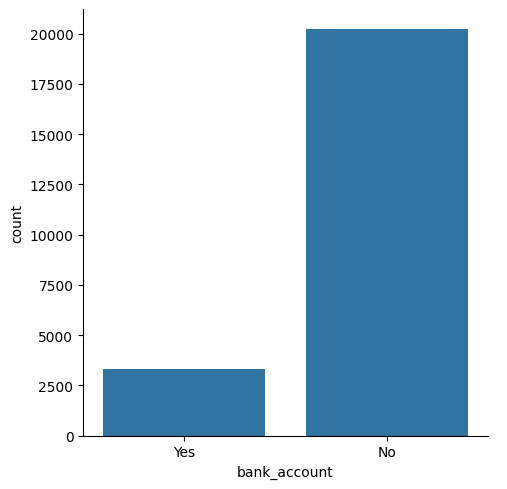

In [ ]:
#Load the dataset
train = pd.read_csv('/content/Train..csv')

# Explore Target distribution
sns.catplot(x="bank_account", kind="count", data=train)

Majority of the respondents in this dataset don't have bank accounts.

In [ ]:
#show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB
None


In [ ]:
#Let's view the variables
variables.head(12)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


# Univariate Analysis

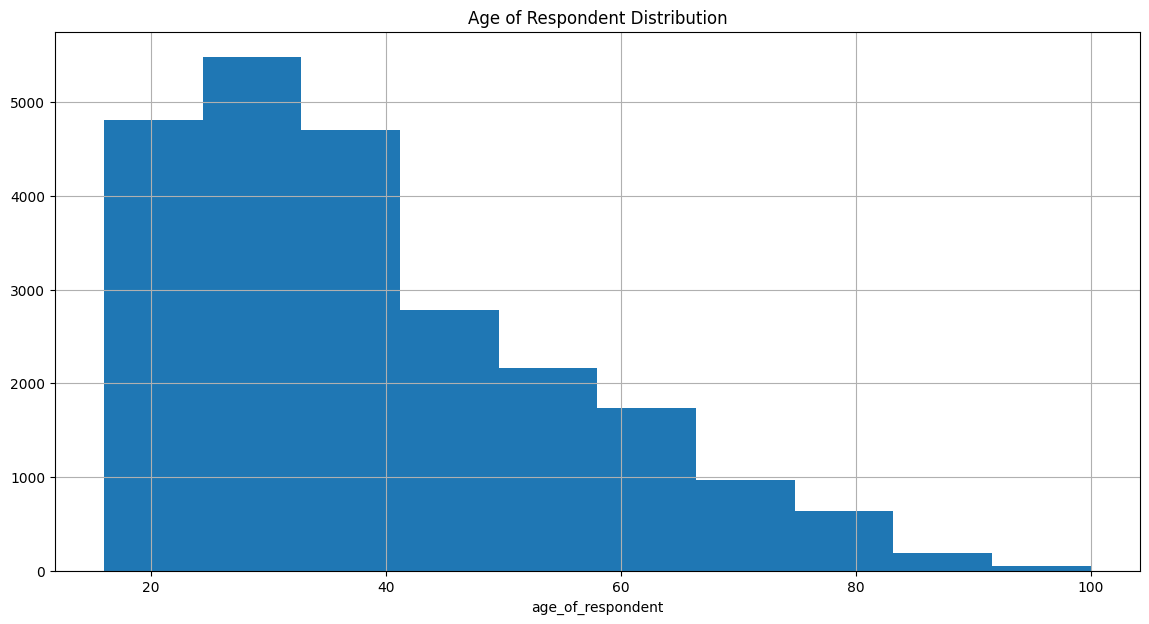

In [ ]:
# Let's start explore age distribution using histogram

plt.figure(figsize=(14,7))
train.age_of_respondent.hist()
plt.title("Age of Respondent Distribution")
plt.xlabel('age_of_respondent')
plt.show()

Majority of people from this dataset are between 20-40 years old.

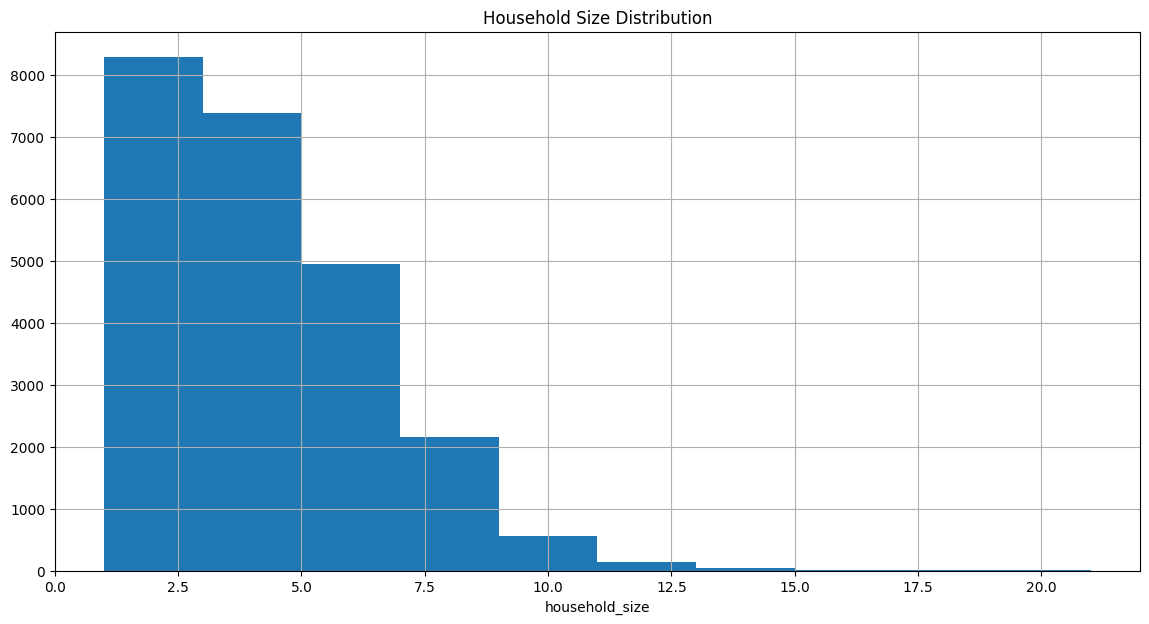

In [ ]:
# Let's start explore household_size distribution using histogram

plt.figure(figsize=(14,7))
train.household_size.hist()
plt.title("Household Size Distribution")
plt.xlabel('household_size')
plt.show()

Household size is not normally distributed and the most common number of people living in the house is 2 - 5.

Text(0.5, 1.0, 'Bank Account Distribution')

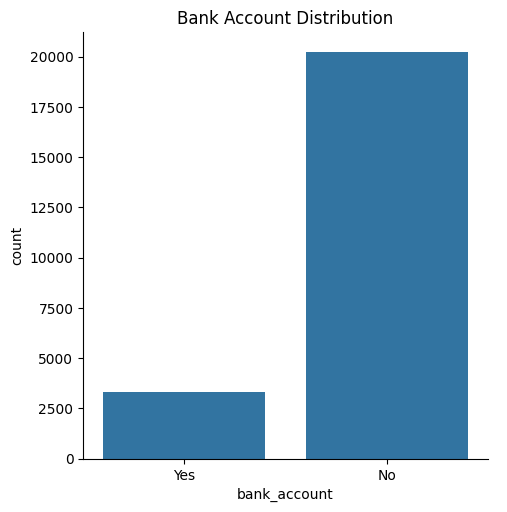

In [ ]:
# Let's explore the distribution of our target column using count

sns.catplot(x="bank_account", kind="count", data=train)
plt.title("Bank Account Distribution")

Majority of the people do not have a bank account.

Text(0.5, 1.0, 'Gender of Respondent Distribution')

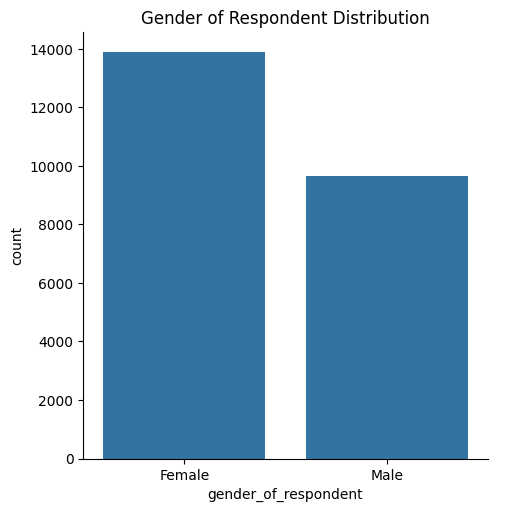

In [ ]:
# Let's explore the distribution of Gender of respondents using count

sns.catplot(x="gender_of_respondent", kind="count", data=train)
plt.title("Gender of Respondent Distribution")

Most of the dataset collected are from female individuals which are up to 14000

Text(0.5, 1.0, 'Country of Respondent Distribution')

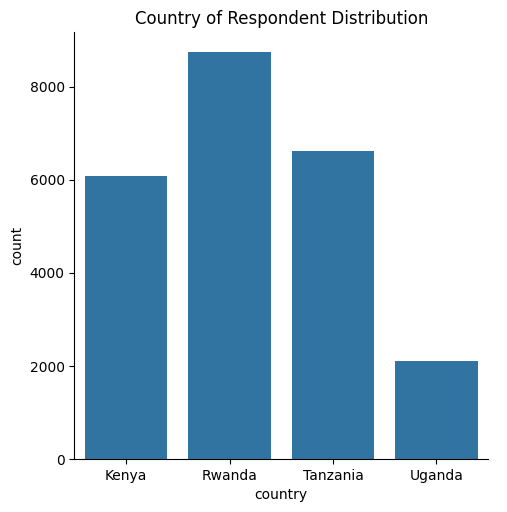

In [ ]:
# Let's explore the distribution of country of respondents using count

sns.catplot(x="country", kind="count", data=train)
plt.title("Country of Respondent Distribution")

Most of the respondents from this dataset are from Rwanda.


Text(0.5, 1.0, 'Year Distribution')

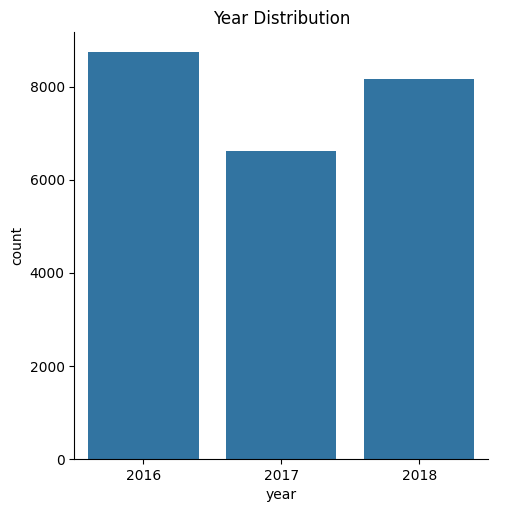

In [ ]:
# Let's explore the distribution of Year of respondents using count

sns.catplot(x="year", kind="count", data=train)
plt.title("Year Distribution")

The most data was collected from our correspondents in 2016.

Text(0.5, 1.0, 'Location Distribution')

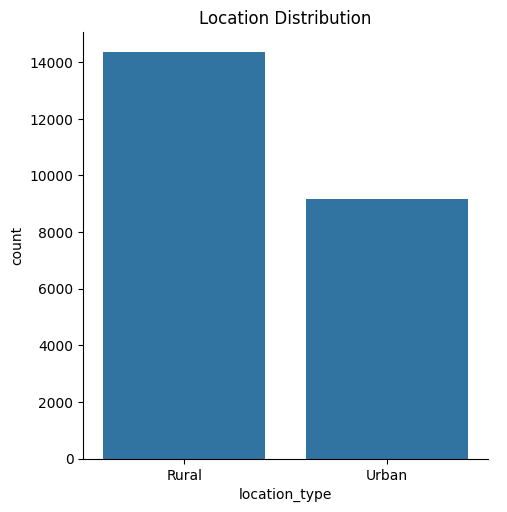

In [ ]:
# Let's explore the distribution of location_type of respondents using count

sns.catplot(x="location_type", kind="count", data=train)
plt.title("Location Distribution")

Most respondents are coming from the rural area.

Text(0.5, 1.0, 'Cellphone Acess Distribution')

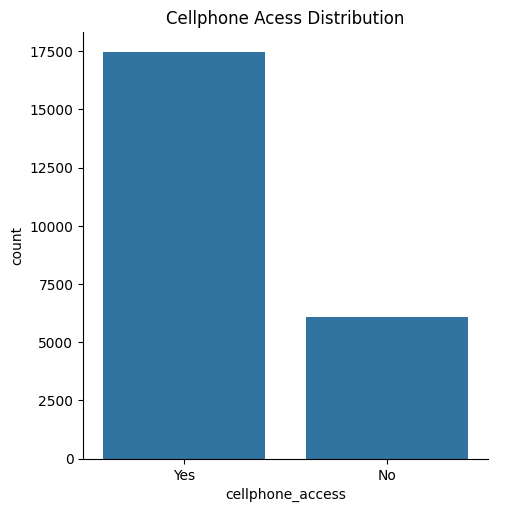

In [ ]:
# Let's explore the distribution of cellphone_access using count

sns.catplot(x="cellphone_access", kind="count", data=train)
plt.title("Cellphone Acess Distribution")

Most respondents own cellphones.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

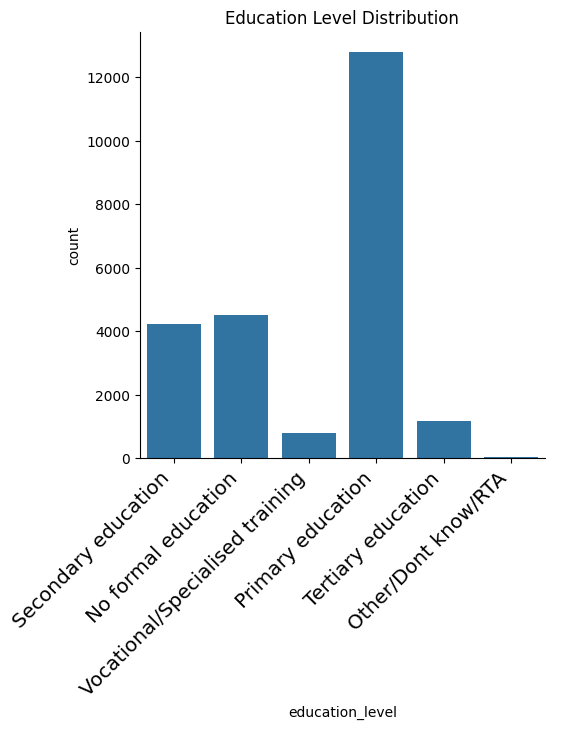

In [ ]:
# Let's explore the distribution of Education level using count

sns.catplot(x="education_level", kind="count", data=train)
plt.title("Education Level Distribution")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Most respondents were at the primary education level.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

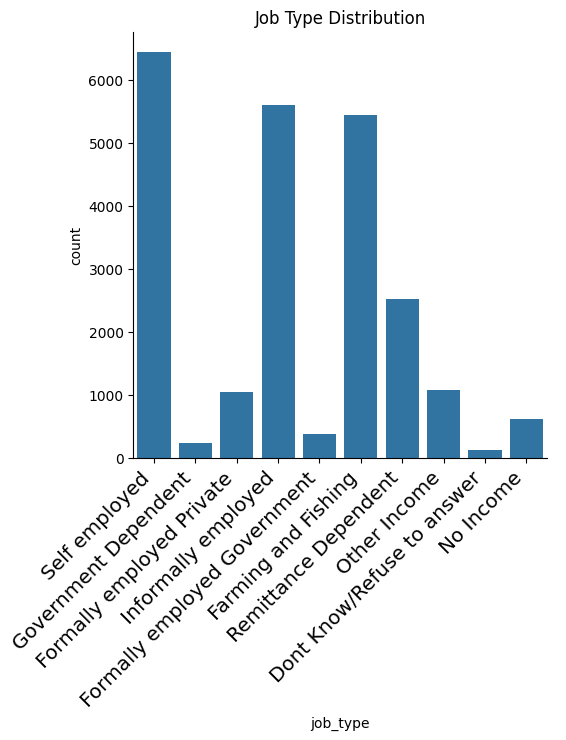

In [ ]:
# Let's explore the distribution of Job Type using count

sns.catplot(x="job_type", kind="count", data=train)
plt.title("Job Type Distribution")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

Most respondents in the dataset were self-employed.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

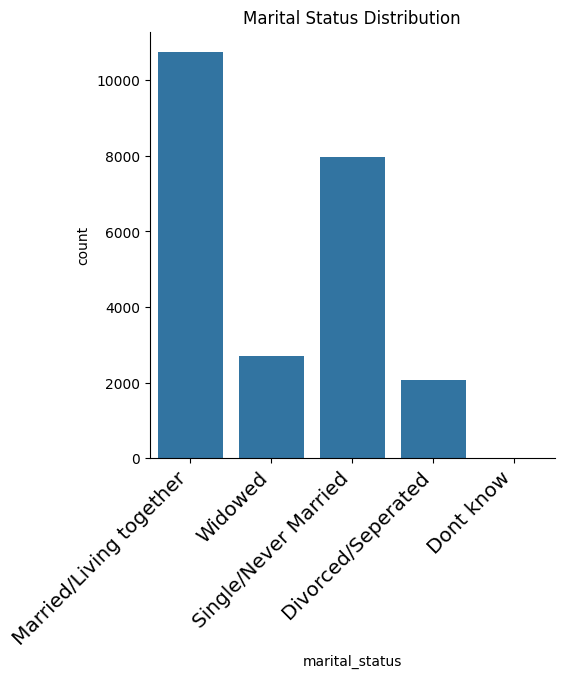

In [ ]:
# Let's explore the distribution of marital_status  using count

sns.catplot(x="marital_status", kind="count", data=train)
plt.title("Marital Status Distribution")

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)


Most people from this dataset were married.

# Bivariate Analysis

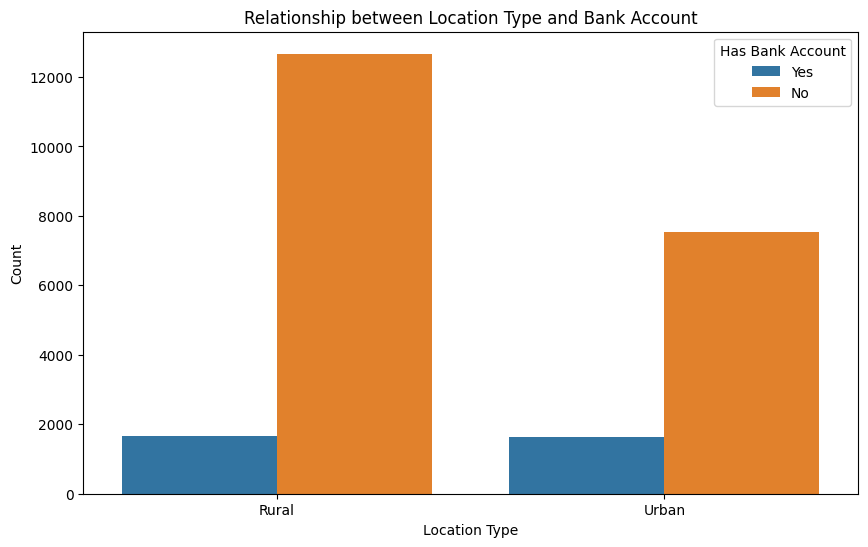

In [ ]:
# Load the dataset
train = pd.read_csv('/content/Train..csv')

# Create a bivariate plot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='location_type', hue='bank_account')
plt.title('Relationship between Location Type and Bank Account')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Has Bank Account')
plt.show()


Majority of people living in rural areas don't have bank accounts. This could be because they don't have access to relevant information regarding the importance of a bank account.

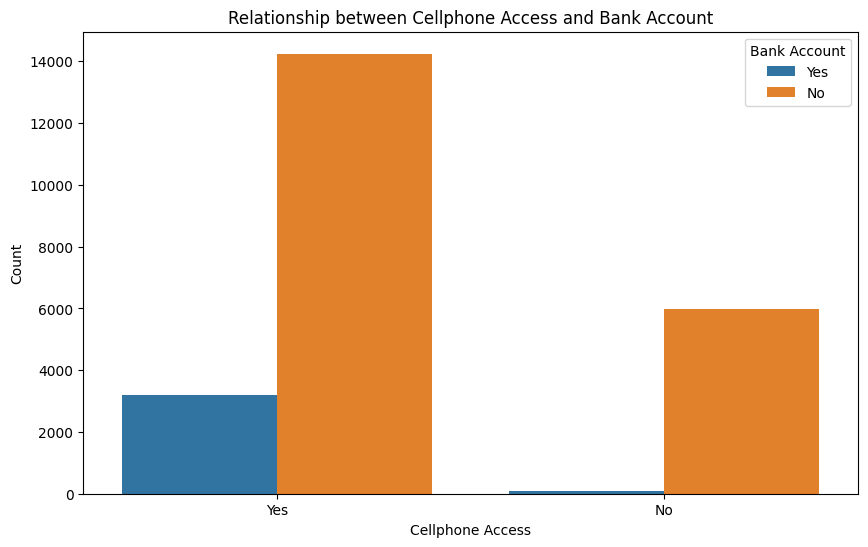

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Create a bar plot to visualize the relationship between cellphone access and bank account
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='cellphone_access', hue='bank_account')
plt.title('Relationship between Cellphone Access and Bank Account')
plt.xlabel('Cellphone Access')
plt.ylabel('Count')
plt.legend(title='Bank Account')
plt.show()


Majority of the people with cellphone access don't have a bank account. This could be because they prefer doing their transactions online using other options.

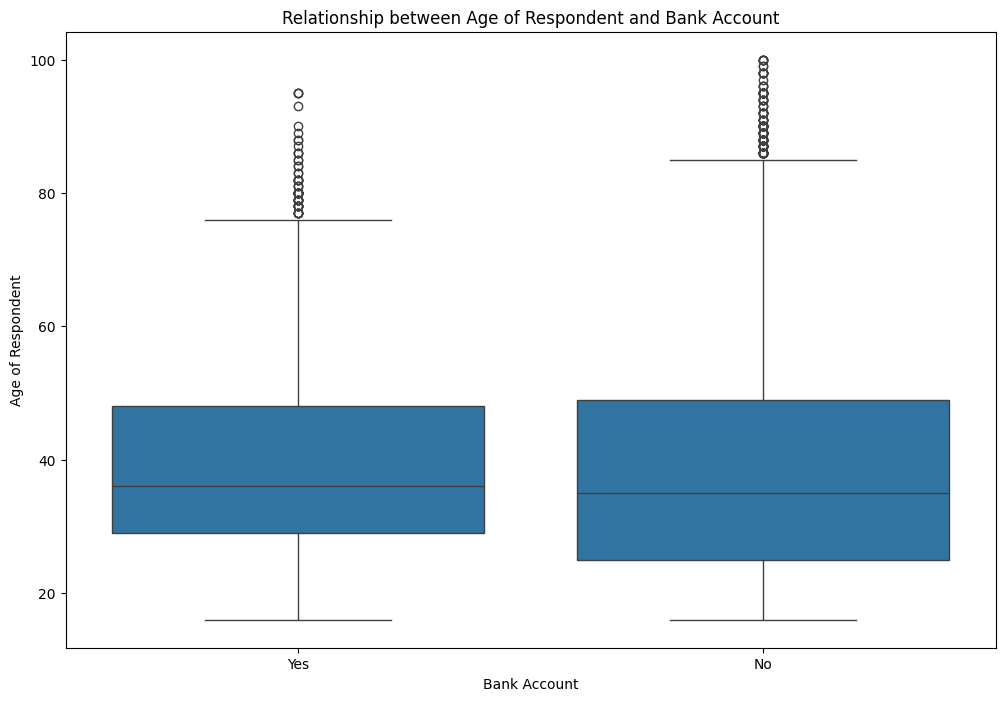

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Create a box plot to visualize the relationship between age of respondent and bank account
plt.figure(figsize=(12, 8))
sns.boxplot(data=train, x='bank_account', y='age_of_respondent')
plt.title('Relationship between Age of Respondent and Bank Account')
plt.xlabel('Bank Account')
plt.ylabel('Age of Respondent')
plt.show()


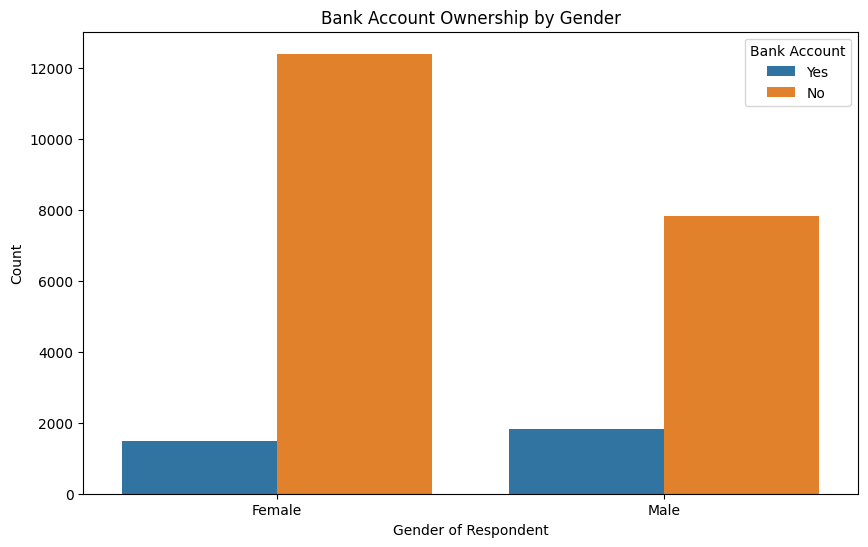

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Create a bar plot to visualize the relationship between gender of respondent and bank account
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='gender_of_respondent', hue='bank_account')
plt.title('Bank Account Ownership by Gender')
plt.xlabel('Gender of Respondent')
plt.ylabel('Count')
plt.legend(title='Bank Account')
plt.show()


More female respondents don't have a bank account compared to the men.

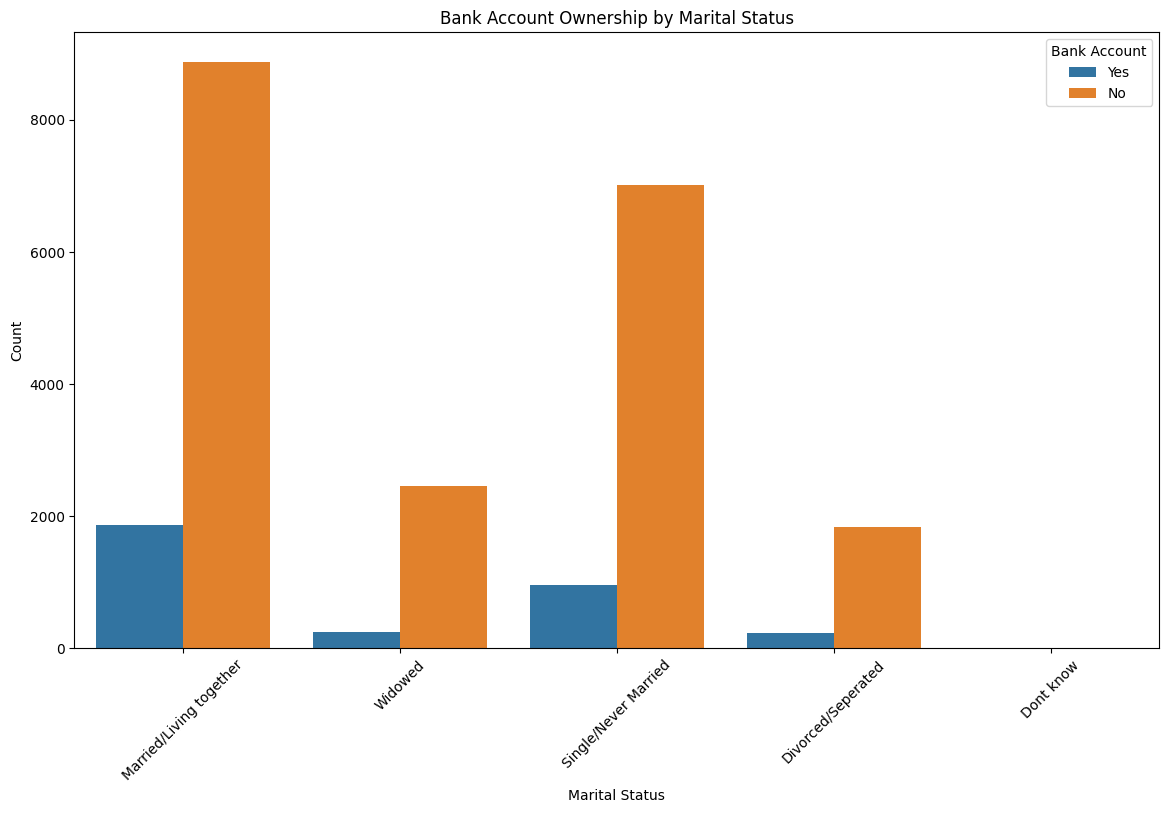

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Create a bar plot to visualize the relationship between marital status and bank account
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='marital_status', hue='bank_account')
plt.title('Bank Account Ownership by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Bank Account')
plt.show()


The correspondents who are married/living together have the highest number of respondents who don't have bank accounts.

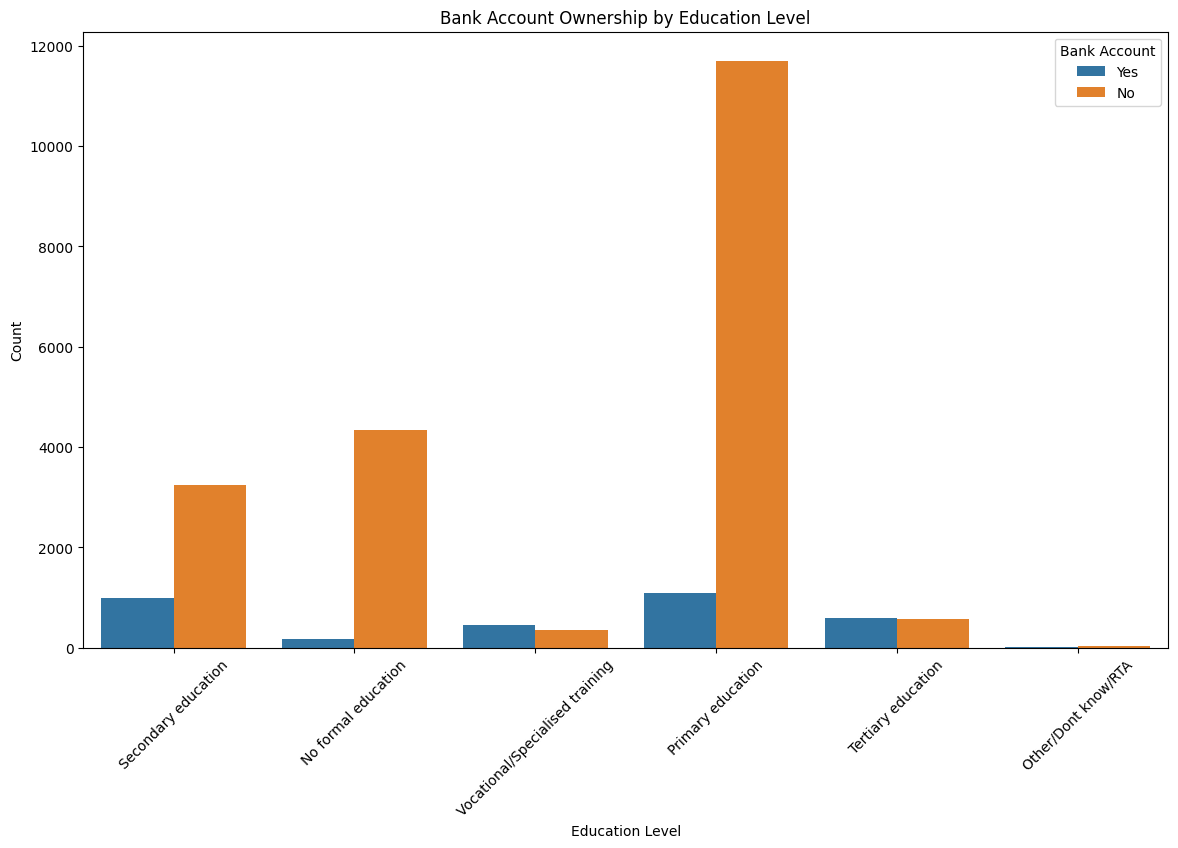

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Create a bar plot to visualize the relationship between education level and bank account
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='education_level', hue='bank_account')
plt.title('Bank Account Ownership by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Bank Account')
plt.show()


The respondents with primary education had the highest number of individuals without a bank account. With a lower level of education, the respondents may not see an importance of owning a bank account.

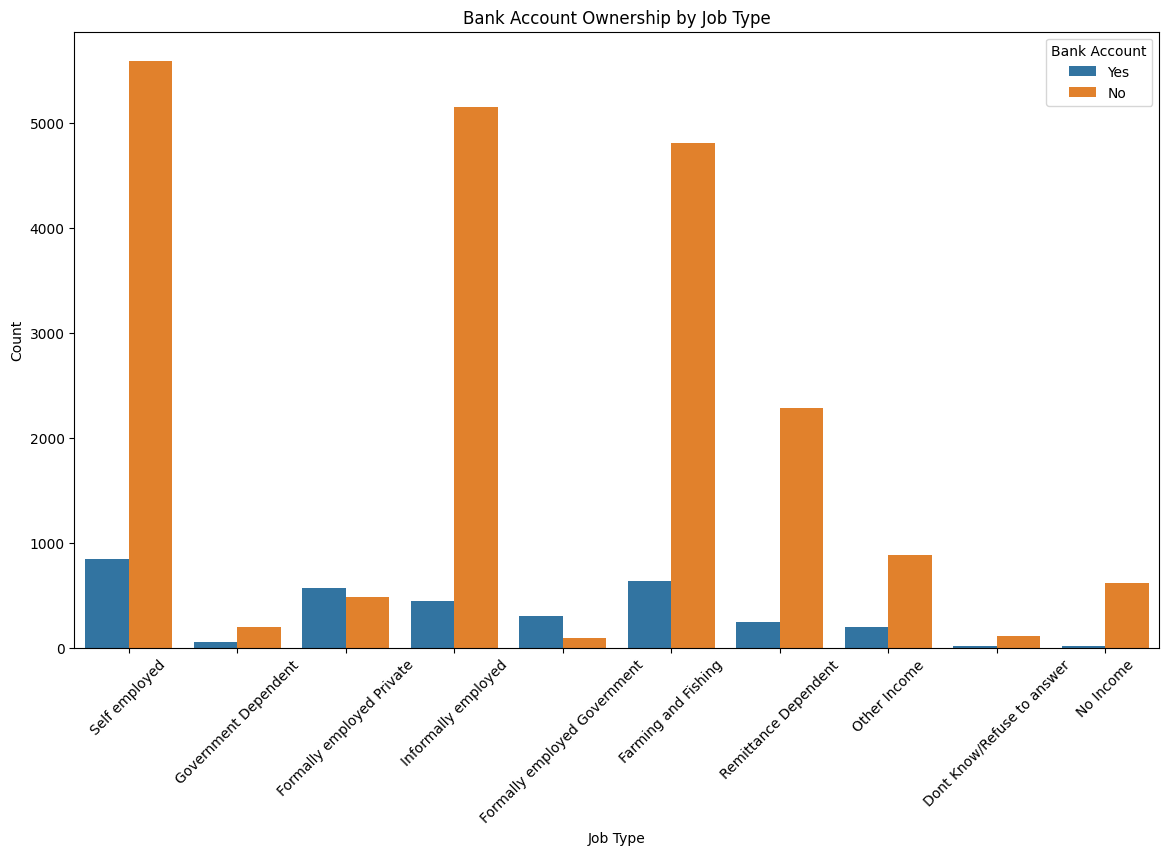

In [ ]:
# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')


# Create a bar plot to visualize the relationship between job type and bank account
plt.figure(figsize=(14, 8))
sns.countplot(data=train, x='job_type', hue='bank_account')
plt.title('Bank Account Ownership by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Bank Account')
plt.show()


The highest number of correspondents without bank accounts are self-employed.

# Correlation

In [ ]:
import pandas as pd

# Load the dataset into a pandas DataFrame
train = pd.read_csv('/content/Train..csv')

# Select numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['year', 'household_size', 'age_of_respondent'], dtype='object')


In [ ]:
# Calculate the Pearson correlation matrix for numerical columns
numerical_corr = train[numerical_cols].corr()
print(numerical_corr)

                       year  household_size  age_of_respondent
year               1.000000       -0.052264          -0.019330
household_size    -0.052264        1.000000          -0.129729
age_of_respondent -0.019330       -0.129729           1.000000


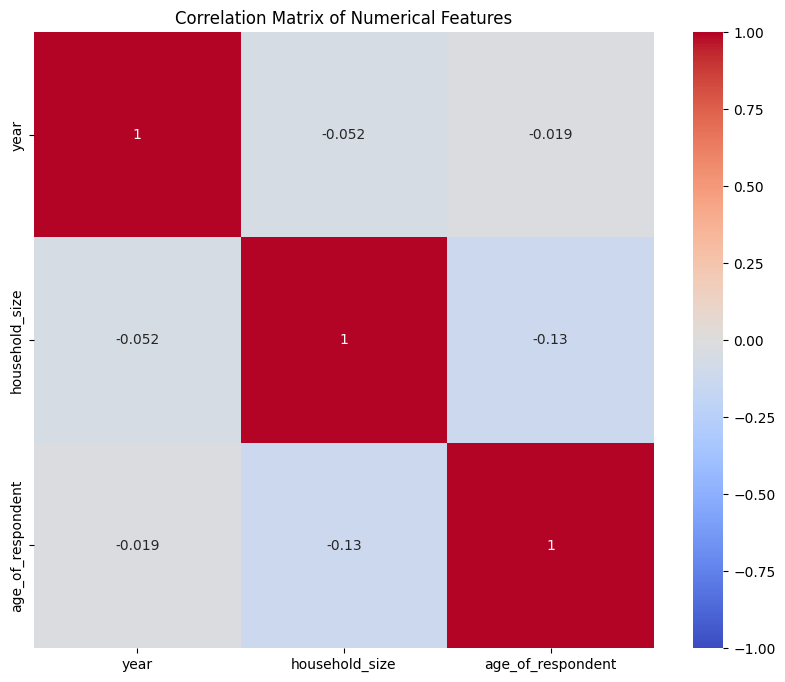

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Year and household size:
There is a very weak negative correlation between the year and household size. This means that as the year increases, the household size very slightly tends to decrease, but this relationship is extremely weak and likely not significant.

Year and age of respondent:
There is a very weak negative correlation between the year and the age of the respondent. This indicates that as the year increases, the age of the respondent very slightly tends to decrease, but this relationship is also extremely weak and likely not significant.

Household size and age of respondent:
There is a weak negative correlation between household size and the age of the respondent. This suggests that as the age of the respondent increases, the household size tends to decrease slightly, but this relationship is not strong.

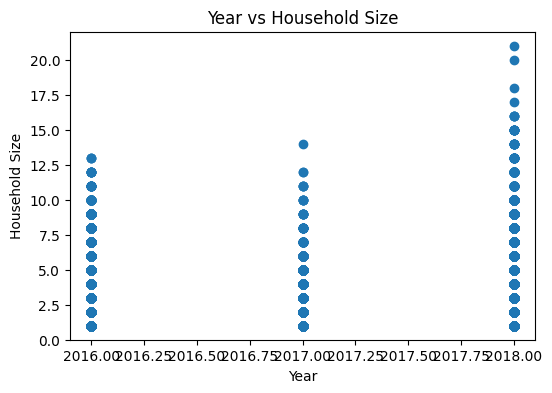

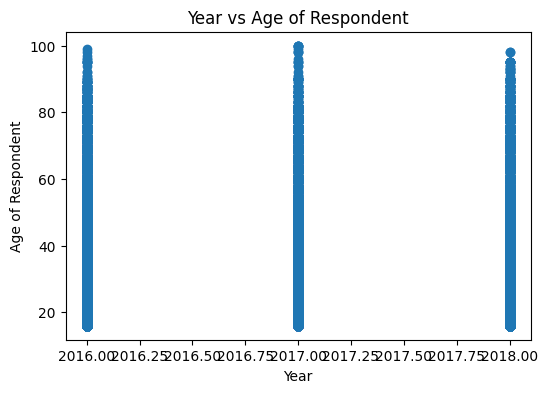

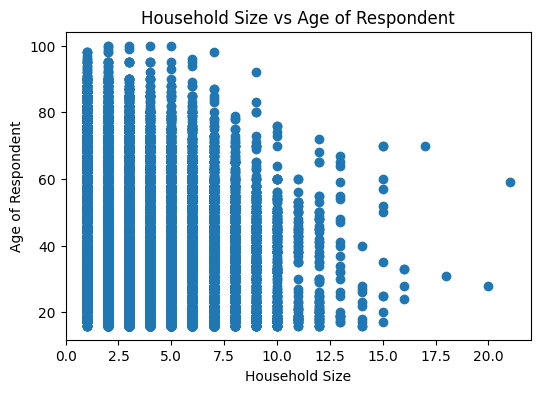

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot between year and household_size
plt.figure(figsize=(6, 4))
plt.scatter(train['year'], train['household_size'])
plt.title('Year vs Household Size')
plt.xlabel('Year')
plt.ylabel('Household Size')
plt.show()

# Scatter plot between year and age_of_respondent
plt.figure(figsize=(6, 4))
plt.scatter(train['year'], train['age_of_respondent'])
plt.title('Year vs Age of Respondent')
plt.xlabel('Year')
plt.ylabel('Age of Respondent')
plt.show()

# Scatter plot between household_size and age_of_respondent
plt.figure(figsize=(6, 4))
plt.scatter(train['household_size'], train['age_of_respondent'])
plt.title('Household Size vs Age of Respondent')
plt.xlabel('Household Size')
plt.ylabel('Age of Respondent')
plt.show()


The scatter plots further confirm that there is a weak correlation among these variables.

#4.  Encoding

In [28]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def preprocessing_data(data):
    # Convert numerical labels from integer to float
    for col in ["household_size", "age_of_respondent", "year"]:
        data[col] = data[col].astype(float)

    # List of categorical features for One Hot Encoding
    categorical_features = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]

    # Apply One Hot Encoding to categorical features
    data = pd.get_dummies(data, columns=categorical_features, prefix_sep="_")

    # Initialize Label Encoder
    le = LabelEncoder()

    # Encode categorical features using Label Encoder
    label_encoded_features = ["location_type", "cellphone_access", "gender_of_respondent"]
    for feature in label_encoded_features:
        data[feature] = le.fit_transform(data[feature])

    # Drop 'uniqueid' column
    data.drop(columns=["uniqueid"], inplace=True)

    # Scale data to range [0, 1]
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    return scaled_data


In [29]:
# preprocess the train data
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [30]:
# the first train row
print(processed_train[:1])

[[1.        0.        1.        0.1       0.0952381 0.        0.
  0.        0.        0.        0.        1.        0.        0.
  1.        0.        0.        0.        0.        0.        1.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        1.        1.        0.
  0.        0.       ]]


# 5. Feature Selection

This step preprocesses the features, encodes categorical variables, selects relevant features using Lasso regularization, and trains a Lasso regression model on the preprocessed data.

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Load the dataset
train = pd.read_csv('/content/Train..csv')

# Convert numerical labels to float
train[["household_size", "age_of_respondent", "year"]] = train[["household_size", "age_of_respondent", "year"]].astype(float)

# Define feature columns and target
X = train.drop(columns=['uniqueid', 'bank_account'])  # Adjust according to your target variable
y = train['bank_account']  # Adjust according to your target variable

# Encode the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# Categorical features to be converted to One Hot Encoding
categ = ["relationship_with_head", "marital_status", "education_level", "job_type", "country"]

# Label encoding features
label_enc = ["location_type", "cellphone_access", "gender_of_respondent"]

# Apply Label Encoding to specific columns
for col in label_enc:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Perform preprocessing and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ["household_size", "age_of_respondent", "year"]),
        ('cat', OneHotEncoder(drop='first'), categ)
    ],
    remainder='passthrough'
)

X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = lasso.coef_
preprocessed_columns = (
    ["household_size", "age_of_respondent", "year"] +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categ).tolist()
)

# Print selected features
selected_features = [feature for feature, coef in zip(preprocessed_columns, coefficients) if coef != 0]
print('Selected Features:', selected_features)


Selected Features: ['age_of_respondent', 'year', 'relationship_with_head_Head of Household', 'marital_status_Married/Living together', 'education_level_Primary education', 'education_level_Tertiary education', 'education_level_Vocational/Specialised training', 'job_type_Formally employed Private', 'job_type_Informally employed', 'country_Tanzania']


In [72]:
# shape of the processed train set
print(processed_train.shape)
print(processed_test.shape)

(23524, 37)
(10086, 37)


# SMOTE Analysis
SMOTE Analysis will address class imbalance which occurs when one class (usually the minority class) has significantly fewer samples than the other class(es). This will help improve the model's ability to learn from the minority class.

In [64]:
from imblearn.over_sampling import SMOTE

# Drop categorical columns from X
X = X.select_dtypes(exclude=['object'])

# Perform SMOTE analysis
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 6. Model Evaluation

In [73]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (90% training, 10% validation)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Split the training and validation data further (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Debug: Print the shapes of the train, validation, and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (14114, 32)
Shape of X_val: (4705, 32)
Shape of X_test: (4705, 32)
Shape of y_train: (14114,)
Shape of y_val: (4705,)
Shape of y_test: (4705,)


**Model Evaluation Using Random Forest**

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.867375132837407
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      4006
           1       0.58      0.39      0.47       699

    accuracy                           0.87      4705
   macro avg       0.74      0.67      0.70      4705
weighted avg       0.85      0.87      0.86      4705

Confusion Matrix:
 [[3809  197]
 [ 427  272]]


The model accuracy using Random Forest is 86.7%.

**Model Evaluation with XGBoost**

In [75]:
import xgboost as xgb

# Initialize and fit the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = xgb_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_val, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.8758767268862911
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      4006
           1       0.64      0.37      0.47       699

    accuracy                           0.88      4705
   macro avg       0.77      0.67      0.70      4705
weighted avg       0.86      0.88      0.86      4705

Confusion Matrix:
 [[3863  143]
 [ 441  258]]


The model correctly predicted the target label for 87.6% of the validation samples.There is some imbalance in the performance between the two classes, with class 1 having lower recall. This might be due to class imbalance in the data or the complexity of correctly identifying instances of class 1.

**Model Evaluation Using Logistic Regression**

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=200)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_log_reg = log_reg.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_reg)
print("Accuracy:", accuracy)

# Print the classification report
class_report = classification_report(y_val, y_pred_log_reg)
print("Classification Report:\n", class_report)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8803400637619554
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4006
           1       0.70      0.33      0.45       699

    accuracy                           0.88      4705
   macro avg       0.80      0.66      0.69      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix:
 [[3908   98]
 [ 465  234]]


The accuracy of the logistic regression model is 88%.

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svm)
print("Accuracy:", accuracy)

# Print the classification report
class_report = classification_report(y_val, y_pred_svm)
print("Classification Report:\n", class_report)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8831030818278427
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4006
           1       0.76      0.31      0.44       699

    accuracy                           0.88      4705
   macro avg       0.82      0.65      0.69      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix:
 [[3936   70]
 [ 480  219]]


The accuracy of the SVM model is 88.3%.

# 7. Hyperparameter Tuning
**Performing further tuning of the XGBoost model's hyperparameters using grid search to improve performance.**

In [78]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a simpler parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Best estimator
best_xgb = grid_search.best_estimator_

# Evaluate the model
y_pred = best_xgb.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8807651434643996
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4006
           1       0.70      0.34      0.46       699

    accuracy                           0.88      4705
   macro avg       0.80      0.66      0.70      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix:
 [[3906  100]
 [ 461  238]]


The model accuracy has increased to 88% from 87.6% after hyperparameter tuning.

**Performing further tuning of the Random Forest model's hyperparameters using grid search to improve performance.**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a simple parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                              cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search_rf.best_params_)

# Best estimator
best_rf = grid_search_rf.best_estimator_

# Evaluate the model
y_pred_rf = best_rf.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8799149840595112
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4006
           1       0.72      0.32      0.44       699

    accuracy                           0.88      4705
   macro avg       0.80      0.65      0.69      4705
weighted avg       0.87      0.88      0.86      4705

Confusion Matrix:
 [[3919   87]
 [ 478  221]]


The random forest model performance increases to 88% from 86.7% after hyperparameter tuning.

# 8. Prediction

In [86]:
# Predict labels for the test data using the SVM model
y_pred_test = svm_model.predict(X_test)

print(y_pred_test)

[0 0 0 ... 0 0 0]


In [93]:
import pandas as pd

# Read the CSV files
train = pd.read_csv('/content/Train..csv')
test = pd.read_csv('/content/Test..csv')
submission = pd.read_csv('/content/SampleSubmission.csv')
variables = pd.read_csv('/content/VariableDefinitions.csv')

# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": train["uniqueid"] + " x " + train["country"],
                           "bank_account": train["bank_account"]})

# Map 'bank_account' values to 0 and 1
submission['bank_account'] = submission['bank_account'].map({'No': 0, 'Yes': 1})

# Display the first few rows of the submission DataFrame
print(submission.head(10))



              uniqueid  bank_account
0   uniqueid_1 x Kenya             1
1   uniqueid_2 x Kenya             0
2   uniqueid_3 x Kenya             1
3   uniqueid_4 x Kenya             0
4   uniqueid_5 x Kenya             0
5   uniqueid_6 x Kenya             0
6   uniqueid_7 x Kenya             0
7   uniqueid_8 x Kenya             0
8   uniqueid_9 x Kenya             1
9  uniqueid_10 x Kenya             0
